In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

# Import Densenet from Keras
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

In [ ]:
trdata = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    #zoom_range = 0.2,
    #horizontal_flip = True,
    #fill_mode= 'nearest',

)
traindata = trdata.flow_from_directory('/content/drive/MyDrive/Eye diseases/dataset/Training',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,
                                    )
tsdata = ImageDataGenerator(rescale=1./255)
testdata = tsdata.flow_from_directory('/content/drive/MyDrive/Eye diseases/dataset/Testing',
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical',
                                      shuffle=False,
                                    )

Found 3416 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [ ]:
traindata.class_indices

{'Cataract': 0, 'Diabetic Retinopathy': 1, 'Glaucoma': 2, 'Normal': 3}

In [ ]:
testdata.class_indices

{'Cataract': 0, 'Diabetic Retinopathy': 1, 'Glaucoma': 2, 'Normal': 3}

In [ ]:
# Create the base pre-trained model
vgg = VGG16(weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Print the model summary
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vgg.trainable = False

In [ ]:
VGG = VGG16(input_shape = (224,224,3), include_top = False, weights='imagenet')

In [ ]:
model = keras.Sequential([
                          VGG,
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=256,activation='relu'),
                          keras.layers.Dense(units=256,activation='relu'),
                          keras.layers.Dense(units=256,activation='relu'),

                          #keras.layers.Dropout(0.5),
                          keras.layers.Dense(units=4,activation='softmax'),
])


In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,270,084 (81.14 MB)

 Trainable params: 21,270,084 (81.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(
    traindata,
    #steps_per_epoch=50,
    epochs=10,
    validation_data=testdata,
    validation_steps=5,
    #callbacks = [learning_rate_reduction]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 1540s 13s/step - accuracy: 0.2602 - loss: 1.5069 - val_accuracy: 0.0000e+00 - val_loss: 1.4166
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.2462 - loss: 1.3865 - val_accuracy: 0.7063 - val_loss: 1.3535
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 98s 866ms/step - accuracy: 0.2721 - loss: 1.3851 - val_accuracy: 0.6625 - val_loss: 1.3679
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 88s 770ms/step - accuracy: 0.2544 - loss: 1.3867 - val_accuracy: 0.0000e+00 - val_loss: 1.4397
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 141s 773ms/step - accuracy: 0.2574 - loss: 1.3867 - val_accuracy: 0.0000e+00 - val_loss: 1.3635
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 94s 831ms/step - accuracy: 0.2667 - loss: 1.3855 - val_accuracy: 0.0000e+00 - val_loss: 1.3702
Epoch 7/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


107/107 ━━━━━━━━━━━━━━━━━━━━ 87s 767ms/step - accuracy: 0.2783 - loss: 1.3843 - val_accuracy: 0.0000e+00 - val_loss: 1.4028
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 88s 777ms/step - accuracy: 0.2648 - loss: 1.3853 - val_accuracy: 0.7063 - val_loss: 1.3491
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 88s 783ms/step - accuracy: 0.2600 - loss: 1.3857 - val_accuracy: 0.6625 - val_loss: 1.3667
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 140s 760ms/step - accuracy: 0.2635 - loss: 1.3853 - val_accuracy: 0.0000e+00 - val_loss: 1.4340


In [ ]:
'''
x = Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu")(x)
x = Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
'''
x = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
'''
x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)

x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)

x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
'''

'\nx = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)\n\nx = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)\n\nx = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)\nx = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)\n'

In [ ]:
#x=Conv2D(128,(3,3),activation='relu')(x)

In [ ]:
# Add a global spatial average pooling layer
x_pool = GlobalAveragePooling2D()(x)
x_pool

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
predictions = Dense(3, activation="softmax")(x_pool)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
# (You'll customize the loss function in the assignment!)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

In [ ]:
hist = model.fit(
    traindata,
    #steps_per_epoch=50,
    epochs=17,
    validation_data=testdata,
    validation_steps=2,
    #callbacks = [learning_rate_reduction]
)

Epoch 1/17
249/249 [==============================] - 3476s 14s/step - loss: 0.2368 - accuracy: 0.9308 - val_loss: 0.4403 - val_accuracy: 0.8906
Epoch 2/17
249/249 [==============================] - 145s 584ms/step - loss: 0.0570 - accuracy: 0.9800 - val_loss: 1.3515 - val_accuracy: 0.6406
Epoch 3/17
249/249 [==============================] - 145s 581ms/step - loss: 0.0591 - accuracy: 0.9795 - val_loss: 0.4367 - val_accuracy: 0.8750
Epoch 4/17
249/249 [==============================] - 145s 582ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.3448 - val_accuracy: 0.9219
Epoch 5/17
249/249 [==============================] - 145s 581ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.2060 - val_accuracy: 0.9375
Epoch 6/17
249/249 [==============================] - 145s 581ms/step - loss: 0.0302 - accuracy: 0.9889 - val_loss: 0.6009 - val_accuracy: 0.8594
Epoch 7/17
249/249 [==============================] - 143s 574ms/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.4864 - 

In [ ]:
model.evaluate(traindata)

107/107 ━━━━━━━━━━━━━━━━━━━━ 92s 857ms/step - accuracy: 0.2681 - loss: 1.3852


[1.3852856159210205, 0.2661007046699524]

In [ ]:
model.evaluate(testdata)

27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.2647 - loss: 1.3862


[1.3858228921890259, 0.2604042887687683]

In [ ]:
p = model.predict(testdata)

27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step


In [ ]:
pred_classes = np.argmax(p, axis=1)

In [ ]:
pred_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
true_classes = testdata.classes

In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(true_classes,pred_classes)
cm

array([[  0, 207,   0,   0],
       [  0, 219,   0,   0],
       [  0, 201,   0,   0],
       [  0, 214,   0,   0]])

In [ ]:
cmn=cm/cm.astype(np.float).sum(axis=1)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
labels=['Covid-19','Normal','Pneumonia']

In [ ]:
sns.heatmap(cmn,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels)

In [ ]:
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels)

In [ ]:
print(classification_report(true_classes,pred_classes, target_names = ['Covid-19 (Class 0)' ,'Normal (Class 1)','Pneumonia (Class 2)',]))

In [ ]:

model.save("/content/drive/Shareddrives/Thenerdone/Models/Single block DenseNet 3k.md5")

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Thenerdone/Models/Single block DenseNet 3k.md5/assets


In [ ]:
IMAGES_PATH="/content/drive/Shareddrives/Thenerdone/BRAC TB Hospital Nilphamari"

In [ ]:
image_names = os.listdir(IMAGES_PATH)

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor



In [ ]:
for i in os. listdir(IMAGES_PATH):
    # load a single image
    new_image = load_image(IMAGES_PATH+"/"+i)

    # check prediction
    p = model.predict(new_image)
    pred_classes = np.argmax(p, axis=1)
    print( pred_classes)

[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


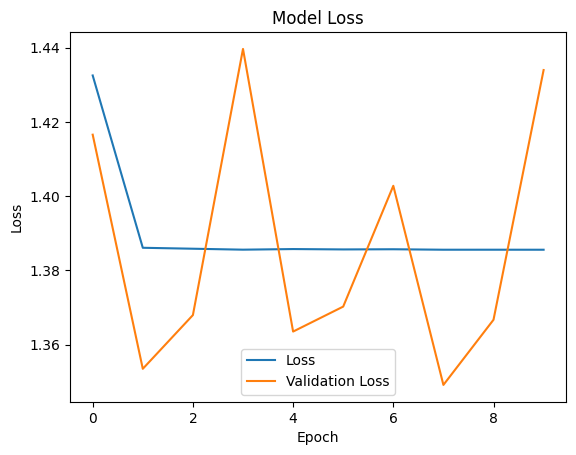

In [ ]:
#plt.plot(M.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Validation Loss'])
plt.show()

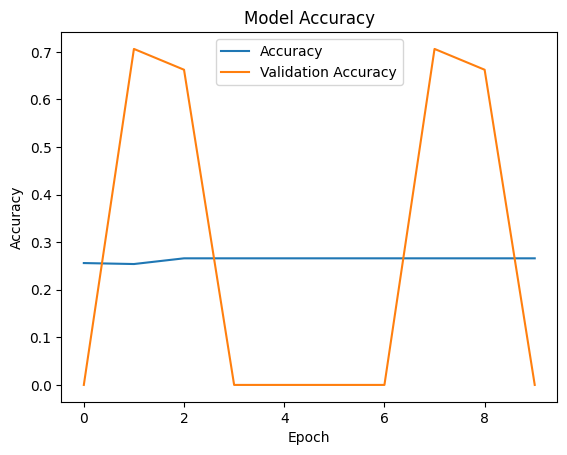

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy'])
plt.show()

In [ ]:
model.summary()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model_builder = model
img_size = (224, 224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_1"

# The local path to our target image
img_path = "/content/drive/Shareddrives/Thenerdone/ChexPert - Covid 3k+/Test2/PneuPM/person1001_bacteria_2932.jpeg"

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted: [[-6.859353   2.2151055  7.3291526]]


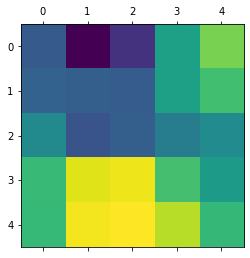

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.7):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)